# Regresi Linear #

## Pengertian ##

Regresi linear adalah jenis prediksi analisis yang sangat sering dilakukan. Pada umumnya  digunakan untuk memeriksa 2 hal, yaitu memprediksi suatu keluaran yang bersifat kontinyu, atau memeriksa fitur yang mempunyai korelasi paling tinggi terhadap target. Fungsi dari regresi linear adalah $y=b_{0}+b_{1}x$  dimana $y$ adalah estimasi target, $b_{1}$ adalah koefisien yang terbentuk dari sebuah model, $x$ adalah nilai dari fitur, dan $b_{0}$ adalah konstanta.


Fungsi Linear Regression adalah sebagai berikut:

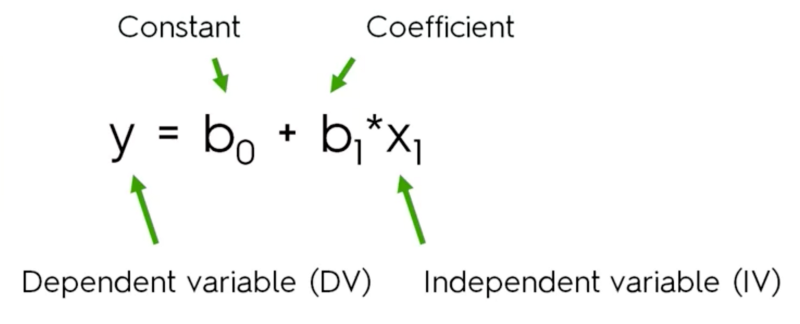

<br>y = target variabel
<br>b0 = konstanta
<br> b1 = koefisien
<br>x1 = nilai dari sebuah fitur

Dalam ilmu statistik, b0 dikenal dengan intercept, yaitu nilai titik saat di perpotongan sumbu y, atau saat x = 0. b1 dikenal sebagai slope, yaitu berfungsi sebagai pengatur bobot dari sebuah fitur. Dari slope ini, akan dapat dilihat kualitas sebuah fitur dalam menentukan output dari model.

Perhatikan gambar berikut.

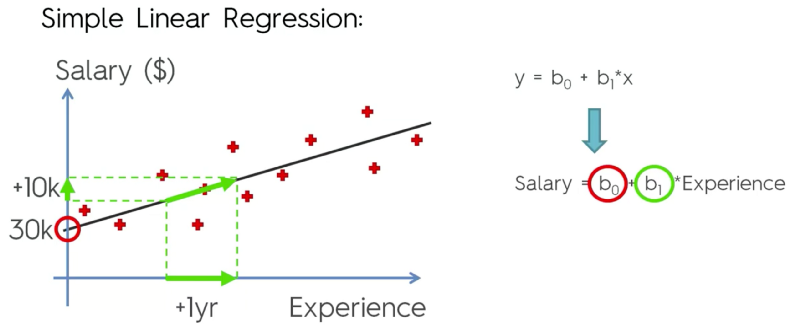

Dalam gambar diatas, terdapat data yang akan dianalisis untuk mengetahui hubungan antara gaji dan pengalaman. Di saat karyawan yang berada di US tidak mempunyai pengalaman kerja, maka ekspektasi gaji menurut fungsi linear regression adalah 30.000 dollar, yang artinya nilai tersebut adalah nilai Intercept. Kemudian kita perhatikan pada rentang 1 tahun gaji, jika kita petakan rentang tersebut terhadap fungsi regresi linear, maka kita dapatkan rentang gaji sebagai nilai slope yaitu 10.000 dollar. Artinya, setiap kenaikan 1 tahun pengalaman, maka gaji karyawan di US mengalami peningkatan 10.000 dollar.

# Bagaimana Linear Regression Menentukan Garis?

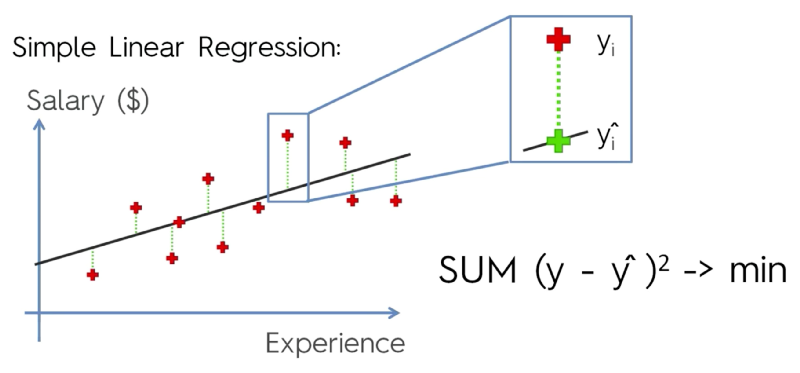

Dalam Machine Learning, model membuat semua garis yang memungkinkan untuk memuat data-data. Kemudian setiap fungsi/garis yang dibuat, dihitung nilai Ordinary Least Squared. Ordinary Least Squared(OLS) digunakan untuk melihat tingkat error pada setiap fungsi yang sudah dibuat oleh model. OLS didapat dari perhitungan antara nilai target yang diobservasi terhadap nilai target menurut model tersebut. Fungsi yang akan dipilih oleh model nanti adalah fungsi yang mempunyai nilai OLS yang paling minimum, yang artinya mempunyai tingkat error paling sedikit.

## CODING SECTION ##

In [1]:
import numpy as np #aljabar linear
import pandas as pd #pengolahan data
import matplotlib.pyplot as plt #visualisasi

In [2]:
df = pd.read_csv('salary.csv') #membaca data

# Use Case


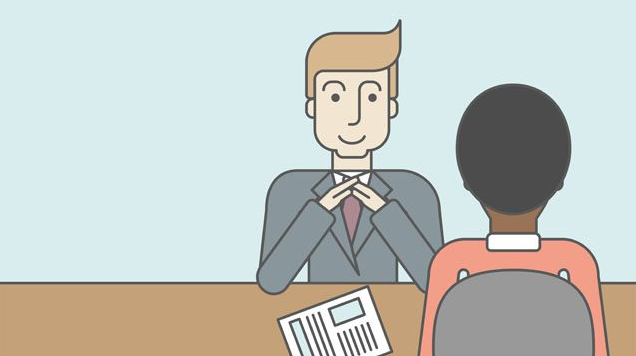

Misalkan kita ingin menganalisa tingkat kejujuran calon karyawan baru. pada pekerjaan yang dia ingin lamar, dia menceritakan bahwa sudah memiliki pengalaman di pekerjaan tersebut selama 16 tahun dan mempunyai gaji sebesar 20 juta rupiah di perusahaan sebelumnya. Kita ingin melakukan pengecekan terhadap pernyataan calon karyawan tersebut. kita melakukan pengecekan terhadap data-data karyawan yang bekerja di bidang yang sama, yang sudah kita ambil dari situs pencarian kerja. Data dibawah ini adalah data gaji karyawan-karyawan terhadap lama pengalaman mereka bekerja.

In [3]:
df.head(10)

,ID,pengalaman,gaji
0,54940,9.2,19.611
1,55100,18.5,39.167
2,54794,10.5,26.111
3,54650,18.9,44.833
4,54728,4.0,21.889
5,54992,16.0,19.889
6,54888,2.5,14.389
7,54840,0.3,5.667
8,54638,18.6,36.722
9,54682,14.4,22.333


 Dapat kita lihat terdapat 3 kolom yaitu ID, pengalaman, dan gaji. karena kita akan menganalisa gaji, maka gaji akan menjadi target variabel dalam proses machine learning kita. Kemudian untuk fitur, kita akan ambil pengalaman sebagai nilai untuk menentukan gaji karyawan. fitur ID tak akan kita masukkan, karena ID tak memiliki korelasi apapun dengan nilai gaji seseorang.

In [5]:
#mengubah data menjadi array agar bisa dilakukan proses machine learning
X = df.pengalaman.values.reshape(-1,1) 
y = df.gaji.values

In [53]:
#Memisah data untuk proses data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 1/4, random_state = 42)

In [54]:
#import algoritma dari scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#memuat machine learning terhadap data latih
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
y_pred = model.predict(X_test)

# Visualisasi

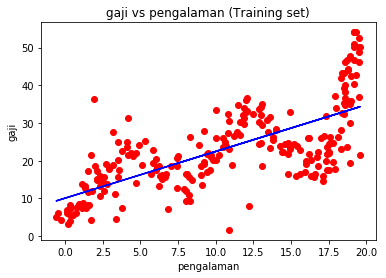

In [56]:
#visualisasi pada data latih
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('gaji vs pengalaman (Training set)')
plt.xlabel('pengalaman')
plt.ylabel('gaji')
plt.show()

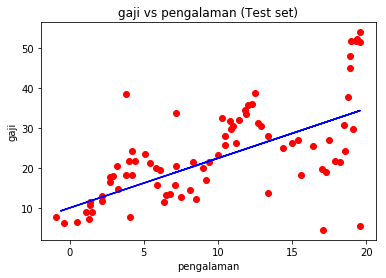

In [57]:
#visualisasi pada data uji
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('gaji vs pengalaman (Test set)')
plt.xlabel('pengalaman')
plt.ylabel('gaji')
plt.show()

# Prediksi model 

In [59]:
model.predict(np.array(16).reshape(1,-1))

array([29.89691978])

# Kesimpulan

Model linear regresi cocok untuk menganalisis data gaji karyawan. Namun dalam implementasi machine learning, kita harus terlebih dahulu melihat dan menganalisis nature dari data itu sendiri, karena tidak semua data bisa diimplementasikan dalam 1 algoritma

## Manual Coding ##
Kita tahu dari ilustrasi di atas bahwa fungsi dasar dari regresi linear adalah sebagai berikut di bawah ini:
\begin{align}
y=b_{0}+b_{1}x \\
\end{align}
Di mana $y$ adalah nilai yang akan diprediksi, $b_{0}$ adalah konstanta, dan $b_{1}$ adalah koefisien. Contoh implementasi menggunakan scikit-learn di atas dilakukan secara black box, di mana kita hanya bisa melihat output akhirnya. Bagaimana apabila kita ingin melihat proses perhitungan secara white box? Kita bisa melakukannya dengan menghitung $b_{0}$ terlebih dahulu.
\begin{align}
b_{1}=r\frac{s_{y}}{s_{x}} \\
\end{align}
Di mana $r$ adalah korelasi Pearson dari $x$ dan $y$, $s_{y}$ adalah standar deviasi dari $y$, dan $s_{x}$ adalah standar deviasi dari $x$
\begin{align}
b_{0}=\overline{y}-b_{1}\overline{x} \\
\end{align}
Menghitung standar deviasi sangatlah mudah. Ilustrasi dari standar deviasi adalah sebagai berikut (sumber: mathisfun.com):
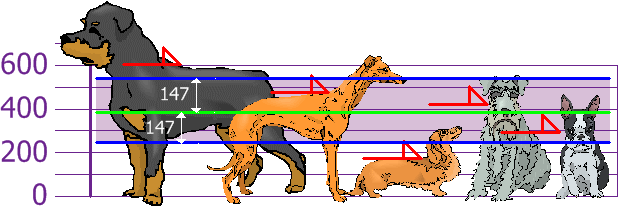
Cara menghitung standar deviasi adalah pertama-tama kita menghitung mean (rata-rata) untuk menghitung variance.

In [32]:
mean_X = X.sum() / X.size
mean_X

10.53312693498452

In [33]:
sigma_X = ((X - mean_X) ** 2).sum() / X.size
sigma_X

39.186673504011345

In [34]:
s_x = np.sqrt(sigma_X)
s_x

6.25992599828555

In [35]:
mean_y = y.sum() / y.size
mean_y

23.467804953560375

In [36]:
sigma_y = ((y - mean_y) ** 2).sum() / y.size
sigma_y

128.33925452852034

In [37]:
s_y = np.sqrt(sigma_y)
s_y

11.328691651224352

In [54]:
import pandas as pd
r = pd.DataFrame([X.flatten(), y.flatten()]).T.corr()
r

,0,1
0,1.000000,0.678039
1,0.678039,1.000000


In [55]:
b1 = r[0][1]* (s_y/s_x)
b1

1.2270591956797692

In [71]:
b0 = mean_y - (b1 * mean_X)
b0

10.543034688725358

In [73]:
y_predict = b0 + (b1 * 16)
y_predict

30.175981819601667